# Weekly Session 7 

## Directions: 
Quickly read through this notebook.  The format differs slightly - Basically the homework/interactive practice and lab is also in the notebook, 
* Exercise 3 is the interactive practice for Wednesday
* Exercise 5 and onward is the **lab** for Thursday (no revision cycle this week).

## Goals

* Explore python features for error handling
* Work more with lists, arrays and matrices
* Apply numpy built-in matrix methods to perform matrix manipulations
* Play with the numpy animation module and animate Newman's Example 6.2

### Reading 
Newman Section 6.1 as outlined on GitHub

In [4]:
#For colored cells, currently black cells, white text is added in Markdown
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Exercise 0: Error and Exceptions
In the course of debugging we encounter a lot of error messages.  In Runestone you read about these messages, but it has been a while.  Let's go back and have a look at the Runestone definitions (quoted directly from the following sections): 

[1.7. Syntax errors](https://runestone.academy/runestone/static/PHY325/GeneralIntro/Syntaxerrors.html)
Python can only execute a program if the program is syntactically correct; otherwise, the process fails and returns an error message. Syntax refers to the structure of a program and the rules about that structure. 

[1.8. Runtime Errors](https://runestone.academy/runestone/static/PHY325/GeneralIntro/RuntimeErrors.html)
The second type of error is a runtime error, so called because the error does not appear until you run the program. These errors are also called **exceptions** because they usually indicate that something exceptional (and bad) has happened.

[1.9. Semantic Errors](https://runestone.academy/runestone/static/PHY325/GeneralIntro/SemanticErrors.html)
The third type of error is the semantic error. If there is a semantic error in your program, it will run successfully in the sense that the computer will not generate any error messages. However, your program will not do the right thing. It will do something else. Specifically, it will do what you told it to do.

We have all been generating plenty of these errors this semester (including me!).  It is a great time to explore a particular common error time, the ```ValueError```. It is defined in Runestone's all important [Know your error messages](https://runestone.academy/runestone/static/PHY325/Debugging/KnowyourerrorMessages.html)  page.


**[3.4.4. ValueError](https://runestone.academy/runestone/static/PHY325/Debugging/KnowyourerrorMessages.html)
Value errors occur when you pass a parameter to a function and the function is expecting a certain limitations on the values, and the value passed is not compatible.**

**READ THE COMMENTS BEFORE RUNNING THE CODE**

In [6]:
### A take on Runestone's example on ValueErrors
### Run the program but instead of typing in anything to the dialog box 
### just click OK. 
### You should see the following error message: 
### ValueError: invalid literal for int() with base 10: '' on line: 4

bug_str = input("How many bugs are in your code (in number 0-1000)?")

if bug_str == "":
    print("You forgot to input a value")
    
else:
    bug_int = int(bug_str)
    
print()
print("You have ", bug_int, "bugs")

How many bugs are in your code (in number 0-1000)?9

You have  9 bugs


<div class=answer>
**How could you modify the code above to anticipate the value error and avoid it?**  
Do so, and see if your modification works.
*I'm assuming you will use an if/else statement, but if you have other ideas, that's fine!.*
<div/>

### Try/Except statements
When I mentioned "other ideas" above, I was refering to python's formal manner for handling anticipated exceptions.  Python has a built in manner to write programs that handle selected exceptions.  See the code below for a ```try/except``` example, which comes from the python documentation:
[https://docs.python.org/2/tutorial/errors.html](https://docs.python.org/2/tutorial/errors.html)

In [7]:
#try/except example

while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")

Please enter a number: *
Oops!  That was no valid number.  Try again...
Please enter a number: 7



<div class=answer>
1.  **What does the code above do?**  Describe it in your own words, but you're welcome to  take a quick peak at the python documentation to get a better idea.

This code asks for a number, it checks to see if what you entered is an integer, and if it is not then it returns the message "Oops!  That was no valid number.  Try again..."  and then repeats until you enter an integer.

2.  **Modify the "bug" code above to anticipate the value error and avoid it using a try/except statement.**   
Please do this below so you can see both codes.
<div/>

In [8]:
while True:
    try: 
        bug_int = int(input("How many bugs are in your code (in number 0-1000)? "))
        print("You have ", bug_int, "bugs")
        break
    except ValueError:
        print("Oops! You forgot to enter the number of bugs.")

How many bugs are in your code (in number 0-1000)? 9
You have  9 bugs


### Raising ValueErrors
Python's error handling built in functions also have the ```raise``` command.  For instance try running the following code so that it raises a value error.  You don't need to do anything with this example quite yet, but ** use this code in the next exericse when you build your own matrix methods** - you are welcome to modify it to suit your preferences.

In [9]:
dimension_A = int(input("Please enter a number dimension A: "))
dimension_B = int(input("Please enter a number dimension B: "))

        
if (dimension_A != dimension_B):
    raise ValueError("matrix dimensions incompatible")

Please enter a number dimension A: 4
Please enter a number dimension B: 4


## Exercise 1: Matrices as Nested Lists

You will be using matrix routines for the rest of your life (or your life in computational
physics, at least). It helps to understand how they work, and you will
develop your own matrix routines this week. So let us start with the basics, and write ourselves a nice little library of matrix routines!  For now, we are still representing two-dimensional arrays as nested lists, rather than numpy arrays.

**Add a matrixB to the code block below so you have some sample data to work with.**

In [10]:
##Example matrices - as lists
A = [[1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    ]

#Add a matrixB of your choice:
B = [[12, 11, 10, 9],
    [8, 7, 6, 5],
    [4, 3, 2],
    ]

print(len(A))

3


### Matrix Dimensions
<div class=answer>
<div/>
Wouldn't it be nice to be able to find out the dimension of a matrix? Write a function
dimension which, given an m $\times$ n matrix, returns the dimensions as a tuple ```(m,n)```. 

Hint: Remember the ```len()``` function.

*If you are ready to think like a computer scientist, read the directions below the code cell BEFORE you proceed.*

In [11]:
import numpy as np

def dimension(matrix):
    
    '''This function inputs a predefined matrix, and outputs the dimensions of the matrix, or returns a value error
    if the matrix is not rectangular.'''
    
    m = len(matrix)
    for i in range(m):
        n = len(matrix[i])
        if len(matrix[i]) != len(matrix[0]):
            raise ValueError("matrix dimensions incompatible")
    return(m,n)  
    

dimension(B)


ValueError: matrix dimensions incompatible

### Thinking like a computer scientist

When you write your dimension function, the easy way out would be to just assume
that the argument is a valid "rectangular" nested list, i.e., with the same number of
entries in each row. But can you actually check this? A little bit of **validation** on your data can go a long way towards saving you debugging time later! For instance, your function
should complain if you give it the "matrix"
```python
[
[1,2,3],
[4,5]
]
```
**Add to your code above method of testing that the matrix is well formatted.**
Let's have your function to crash with a slick Python-style error message, have it raise an exceptions by creating a ValueError exception. You should use an appropriate error string explaining what the problem was with the dimensions. 

### Generating Matrices 
We also need to be able to generate matrices. We have done this two ways:
* "list oriented" i.e., starting from and empty list and then appending entries. 
* A declaration as above

But, traditionally, you would start from an array which already has been created, with the right dimensions, and then you would fill in the entries one by one. 

<div class=answer>
<div/>
So, in the spirit of ```numpy.zeros```, write a function zeros which takes a tuple ```(m,n)``` as its argument and returns an $m\times n$ matrix of zeros.

In [12]:
def zeros(m,n):
    '''This function takes inputs m and n and returns a matrix of zeroes'''
    return np.zeros([m,n], int)


While we are at it, let's write a function ```identity()```, which makes an $n\times n$ identity matrix.  If you need a reminder/lesson, the identity matrix is: 
$$
I_3 = \left[ \begin{array}{cccc}
1 & 0 & 0  \\
0 & 1 & 0 \\
0 & 0 & 1 \\ \end{array} \right]
$$

Since the identity matrix is square, you need just one number n as an argument.  Also, be sure NOT to duplicate work you've already done.  Be lazy.
<div class=answer>
How many loops do you need this time?
<div/>

In [13]:

def identity(n):
    '''This function takes in the dimension of an array and returns the identity matrix in the form of a list.'''
    
    matrix = np.zeros([n,n], int)

    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i,j] = 1
                
    return matrix.tolist()

identity(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

### Matrix Arithmetic

As you either already know from other physics/math courses, or will shortly, one of the basic things you can do to a matrix ```A``` is multiply it by a scalar ```k```. That is, the $(i,j)$th entry of the product matrix, let's call it ```C```, is defined by
$$
C_{i,j} = k\ A_{i,j}
$$
<div class=answer>
Write a function ```scalar_mult``` which multiplies a matrix by a scalar, returning a new matrix.
<div/>

In [14]:
def scalar_mult(scalar, matrix):
    return scalar*matrix
  
scalar = 3
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

C = scalar_mult(scalar, matrix)
print("The matrix", matrix, "multiplied by the scalar", scalar, "is", C)


The matrix [[1 2 3]
 [4 5 6]
 [7 8 9]] multiplied by the scalar 3 is [[ 3  6  9]
 [12 15 18]
 [21 24 27]]


If we have two matrices ```A``` and ```B``` of the same dimensions, we also can compute their sum.
That is, in terms of the entries, the $(i,j)$ th entry of the sum ```C``` is defined by
$$
C_{ij} =  A_{ij} + B_{ij} 
$$

<div class=answer>
Write a function ```add()```, which takes two matrices, and returns their sum. It should check that the dimensions of the two matrices A and B are compatible, and generate an error message (that is, an exception) if not.
<div/>

In [15]:
def add(matrixA, matrixB):
    return matrixA + matrixB

add(C, matrix)

array([[ 4,  8, 12],
       [16, 20, 24],
       [28, 32, 36]])

You knew this was coming, didn't you. The product of an $m \times r$ matrix $A$ and an $r \times n$ matrix $B$ is an $m \times n$ matrix with entries given by
$$
C_{ik} = \sum_{j=1}^r A_{ij} B_{jk}
$$

In case you are rusty (or haven't learned it yet), try multiplying on a whiteboard:

$$
\begin{bmatrix}
1 & 2 & -1\\
3 & 0 & 2
\end{bmatrix}
\begin{bmatrix}
1 & 2 \\
7 & 0 \\
-1 & 3
\end{bmatrix}
=
\begin{bmatrix}
\quad & \quad \\
&
\end{bmatrix}.
$$

<div class=answer>
Write a function ```mult``` which multiplies two matrices, returning a new matrix. It should check that the dimensions of the two matrices $A$ and $B$ are compatible, and generate an exception if not. Try it out with the example product shown above.
<div/>

In [16]:
def mult(matrixA, matrixB):
    
   
    (mA, nA) = dimension(matrixA)
    (mB, nB) = dimension(matrixB)
    result = zeros(mA, nB)
    
    
    if nA != mB:
         raise ValueError("matrix dimensions incompatible")
            
    for i in range(mA):
        for j in range(nB):
            for k in range(mB):
                result[i][j] += matrixA[i][k]*matrixB[k][j]
                
    return result
            
matrixA = [[1,2,-1],
          [3,0,2]]

matrixB = [[1,2],
          [7, 0],
          [-1, 3]]

mult(matrixA, matrixB)
    
        
    

array([[16, -1],
       [ 1, 12]])

## Exercise 2 - Numpy Matrices

Let's run through the tasks in Exercise 1, but this time with the numpy matrix methods.  Here is the [link](https://docs.scipy.org/doc/numpy1.14.0/reference/generated/numpy.matrix.html)
to the basic documentation.  To get you started, here are the numpy way to generate matrices.  Add a second matrix to practice with.

In [17]:
#Declaring new matrix variabls
import numpy as np

a = np.matrix([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],])

#Your matrix here:
b = np.matrix([[7,6,9,12],
              [1,5,3,2],
              [9,10,13,15],])

Play around with the list of attributes in the [link](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.matrix.html).  For instance, what does ```a.shape``` do?

In [18]:
#your code here
print(a.shape)
print(b.shape)
print(a.size)
print(b.size)
print(a.H) # Returns the transpose?
print(b.H)


(3, 4)
(3, 4)
12
12
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]
[[ 7  1  9]
 [ 6  5 10]
 [ 9  3 13]
 [12  2 15]]


### Generating Matrices (part 2)

Use numpy matrix methods ([link](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.zeros.html)) to create an $m\times n$ matrix of zeros.

In [19]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

Use numpy matrix methods ([link](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.identity.html)) to create an $n\times n$ identity matrix.

In [20]:
np.identity(12, int)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

### Matrix Arithmetic
Repeat the matrix arithmetic that you wrote in Exercise 1.  Hopefully you have an idea on how to google numpy methods since I have not provided links for these exerices.  Mark your work clearly using the following three types of arithmetic:
1.  Scalar Multiplication
2.  Matrix Addition
3.  Matrix Multiplication

In [21]:
def scalar_mult(scalar, matrix):
    return scalar*matrix

In [22]:
def add(matrixA, matrixB):
    return matrixA + matrixB

add(C, matrix)

array([[ 4,  8, 12],
       [16, 20, 24],
       [28, 32, 36]])

In [23]:
def matrixMult(matrixA, matrixB):
    return np.multiply(matrixA, matrixB)

## Exercise 3
Do your interactive practice for Wednesday's class here.  Specifically code up Newman's Example 6.1, but encapsulate the Gaussian elimination algorithm into a function you may call (in Exercise 4).

In [24]:
A = np.array([[2, 1, 4, 1],
             [3, 4, -1, -1],
             [1, -4, 1, 5],
             [2, -2, 1, 3]], float)

v = np.array([-4, 3, 9, 7 ],float)
N = len(v)

def gaussian_elimination(N, a, v):
    
    for m in range(N):
        div = a[m,m]
        a[m,:] /= div
        v[m] /= div
        
        for i in range(m+1, N):
            mult = a[i,m]
            a[i,:] -= mult*a[m,:]
            v[i] -= mult*v[m]
            
    x = np.empty(N,float)
    for m in range (N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
            
    return(x)

print(gaussian_elimination(N, A, v))

[ 2. -1. -2.  1.]


## Exercise 4
Do Newman's Exercise 6.1 with circuits, using your own function for Gaussian Elimination.

In [25]:
v = np.array([5,5,0,0], float)
n = len(v)
A = np.array([[4,-1,-1,-1],
             [-1,0,3,-1],
             [-1,3,0,-1],
             [-1,-1,-1,4]], float)

print(gaussian_elimination(n, A, v))

[ 3.          1.66666667  3.33333333  2.        ]


Do Newman's Exercise 6.4, using numpy's linear algebra package

In [26]:
print(np.linalg.solve(A,v))

[ 3.          1.66666667  3.33333333  2.        ]


## Exercise 5 
*This and the next exercise are nominally the "lab" for the week.  Write this part up as it is a lab, describing the physics of coupled harmonic oscillators - and write a nice description of your plots!!!!*

Code up Example 6.2 - you are welcome to use Newman's online resources - but modify them to be more general as follows:  
* Either use your own subroutine for Gaussian elimination or numpy's linear algebra package
* Be sure that you can generalize your code more readily than Newman's example so you can play around with the constants.  Thus write a few more function definitions than he did.

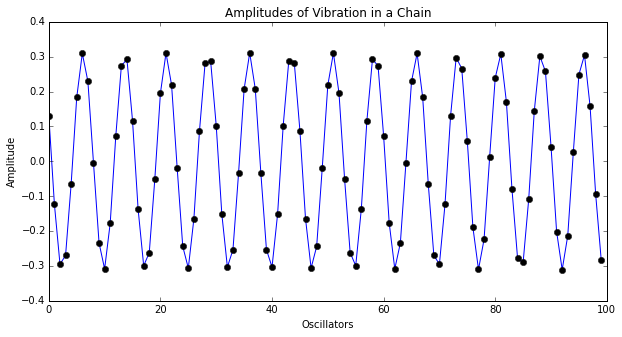

In [114]:
import matplotlib.pylab as plt
# % matplotlib inline

# Constants
N = 100
k = 6.0
omega = 2.0
C = 1.0
m = 1.0

def harmonic(N, k, omega, C, m):
    
   
  
    alpha = 2*k-m*omega*omega
    # Set up the initial values of the arrays
    A = np.zeros([N,N], float)
    for i in range(N-1):
        A[i,i] = alpha
        A[i, i+1] = -k
        A[i+1, i] = -k

    A[0,0] = alpha - k
    A[N-1,N-1] = alpha - k
    v = np.zeros(N,float)
    v[0] = C

    # Perform the Gaussian elimination
    for i in range(N-1):
        A[i,i+1] /= A[i,i]
        v[i] /= A[i,i]

        A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
        v[i+1] -= A[i+1,i]*v[i]

    v[N-1] /= A[N-1,N-1]

    # Back substitution
    x = np.empty(N, float)
    x[N-1] = v[N-1]
    for i in range(N-2, -1, -1):
        x[i] = v[i] - A[i,i+1]*x[i+1]

    return x
    
plt.figure(figsize=(10,5))
plt.title("Amplitudes of Vibration in a Chain")
plt.ylabel("Amplitude")
plt.xlabel("Oscillators")
plt.plot(harmonic(N,k,omega, C, m))
plt.plot(harmonic(N,k,omega, C, m), "ko")
plt.show()


The plot above models the motion of of N identical masses in a row, joined by linear springs.  When a single mass is jostled, all of the masses will vibrate relative to one another.  The movement of one mass will cause a different movement in the adjoining masses.  This idea can be used to model the atoms in a solid.  Each mass oscillates between its equilibrium position and its maximum displacement.  In this scenario, the mass-spring system is floating in outerspace.

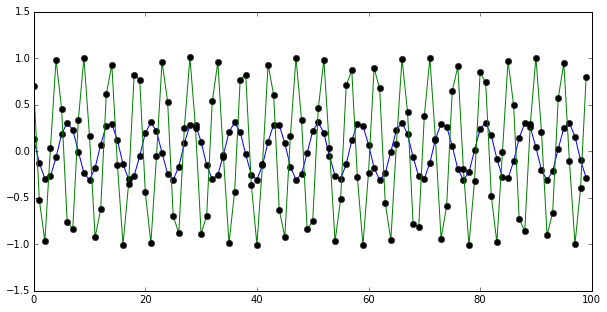

In [127]:
plt.figure(figsize=(10,5))
plt.plot(harmonic(N,k,2, C, m))
plt.plot(harmonic(N,k,2, C, m), "ko")
plt.plot(harmonic(N,k,3, C, m))
plt.plot(harmonic(N,k,3, C, m), "ko")

This plot shows what happens if omega is changed from 2 to 3.  The amplitudes of the oscillators have greater magnitudes when omega is increased.  This is because when the frequency is increased  

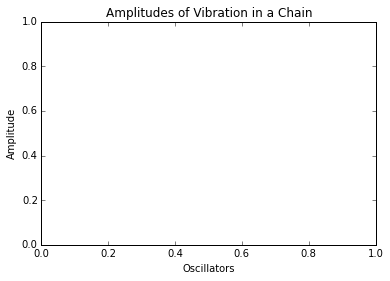

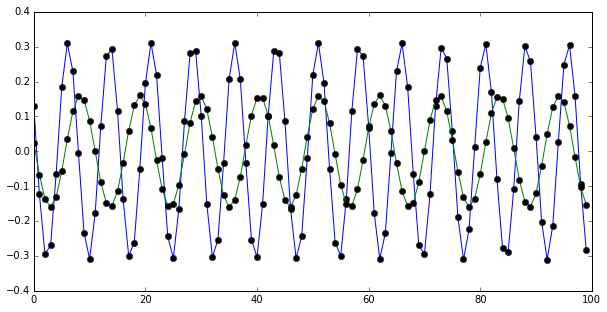

In [123]:
plt.title("Amplitudes of Vibration in a Chain")
plt.ylabel("Amplitude")
plt.xlabel("Oscillators")
plt.figure(figsize=(10,5))
plt.plot(harmonic(N,6,2, C, m))
plt.plot(harmonic(N,6,2, C, m), "ko")
plt.plot(harmonic(N,12,2, C, m))
plt.plot(harmonic(N,12,2, C, m), "ko")

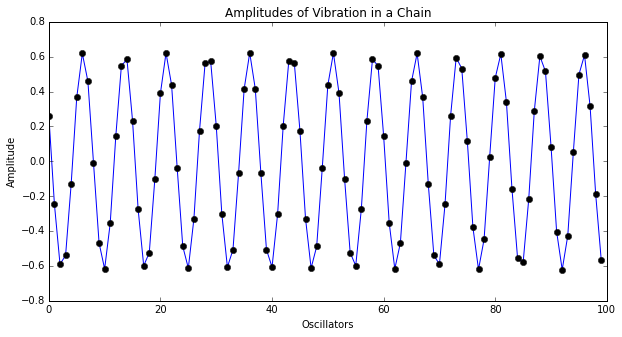

In [109]:
plt.title("Amplitudes of Vibration in a Chain")
plt.ylabel("Amplitude")
plt.xlabel("Oscillators")
plt.figure(figsize=(10,5))
plt.plot(harmonic(N,6,2, C, m))
plt.plot(harmonic(N,6,2, C, m), "ko")
plt.plot(harmonic(N,12,2, C, m))
plt.plot(harmonic(N,12,2, C, m), "ko")

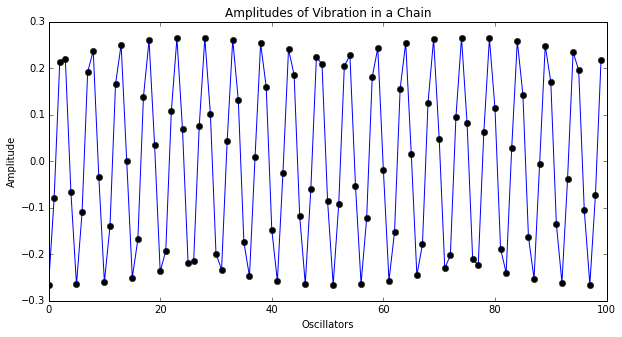

In [110]:
plt.title("Amplitudes of Vibration in a Chain")
plt.ylabel("Amplitude")
plt.xlabel("Oscillators")
plt.figure(figsize=(10,5))
plt.plot(harmonic(N,6,2, C, m))
plt.plot(harmonic(N,6,2, C, m), "ko")
plt.plot(harmonic(N,12,2, C, m))
plt.plot(harmonic(N,12,2, C, m), "ko")

In [58]:
t = np.linspace(0,2*np.pi,N)
N1 = np.linspace(0,N,N)  #where N=number of oscillators as in Newman
amplitude = x*np.cos(omega*t[0])
fig, ax = plt.subplots()
l2, = ax.plot(N1,amplitude,"--ko")

def ani_x(i):
    amplitude = x*np.cos(omega*t[i]) 
    l2.set_data(N1,amplitude)
    
ani = matplotlib.animation.FuncAnimation(fig, ani_x, frames=len(t))    
ani
plt.show()

## Exercise 6
Do as Newman directed in Exercise 6.6 and animate your results from Exercise 5.  You may teach yourself the visual tools (see Ch 3), but I much prefer the animation library as more general and useful.  Here is some code to get you started.  Hints follow the code definitions.

### With credit to the following two sources

 * https://matplotlib.org/gallery/animation/simple_anim.html   
    I couldn't get the jupyter notebook from matplotlib working, but this worked well:
* [stack overflow solution](https://stackoverflow.com/questions/47138023/matplotlib-animation-in-jupyter-notebook-creates-additional-empty-plot)

** NOTHING WILL HAPPEN WHEN YOU RUN THE FOLLOWING CELL**  
NOTE: with Jupyter magics, you want "%%capture" to be at the head of the cell.

In [59]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
#x = np.sin(t)

fig, ax = plt.subplots()
h = ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])
N1 = np.linspace(0,N,N)

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [37]:
# run this cell to call the "ani" animation object called above.  
# You should see a blank plot and a set of controllers.  
# Have fun with this, and then modify it to work with your code in Exercise 5
ani
plt.show()

### Hints to Modify
To do a line animation, you will have to modify the plotstyle used by Newman.  Instead of using: 
```
plt.plot(x)
```
in order to plot all of the oscillators, you will need to declare a variable for the x-axis (NOT TIME) that counts all of the oscillators.  This was my way to do so:
```
N1 = np.linspace(0,N,N)  #where N=number of oscillators as in Newman
```
I also used equation 6.53 to calculate an amplitude from my calculated x-values.
```
amplitude = #Leaving this for you to do
```
Then I plotted those two variables: 
```
fig, ax = plt.subplots()
l, = ax.plot(N1,amplitude,"--ko")

```
Then I defined an animation function (similar to that in the sample below) that updated the amplitudes for new time values (I replaced the t[:i] with t[i] - think about why that is important).  Then I updated the values for the line plot with: 

```
def ani_x(i):
    amplitude = #LEAVING THIS FOR YOU   
    l2.set_data(N1,amplitude)
```

See if you can put those ideas together.  If it seems a little convoluted to declare N1, you are welcome to use a different method to animate the data.  The line plot needs two variables.



## Exercise 7
Play around with your working code.  Modify the constants, add lots of good labels (remember, this is a lab-like assignment).  Make the plots beautiful and have fun.